In [1]:
import os, sys
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFE

from numpy import set_printoptions
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB


In [2]:
exps_dir = "../../exps"
if os.path.exists(exps_dir) == False: # tạo thư mục (nếu chưa có)
  os.makedirs(exps_dir, exist_ok=True)

save_dir = f"{exps_dir}/feature1"
os.makedirs(save_dir, exist_ok=True)
test_size=0.33
seed=42


In [3]:
x_train=pd.read_excel(f'{save_dir}/x_train.xlsx')
y_train=pd.read_excel(f'{save_dir}/y_train.xlsx')
x_test=pd.read_excel(f'{save_dir}/x_test.xlsx')
y_test=pd.read_excel(f'{save_dir}/y_test.xlsx')
class_weights_dict=dict(np.load(f'{exps_dir}/feature1/class_weights_dict.npz',allow_pickle=True))['class_weights_dict']
class_weights_dict = {key: value for key, value in class_weights_dict.item().items()}
class_weights_dict

{0: 0.654690618762475, 1: 2.1161290322580646}

In [4]:
feature_selection=dict(np.load(f'{exps_dir}/feature1/feature_model_selection.npz',allow_pickle=True))['feature_model_selection']
feature_selection = {key: value for key, value in feature_selection.item().items()}
feature_selection

{'LR': ['capital-gains',
  'incident_severity',
  'injury_claim',
  'insured_sex',
  'number_of_vehicles_involved',
  'property_claim',
  'property_damage',
  'total_claim_amount',
  'umbrella_limit',
  'vehicle_claim'],
 'LDA': ['capital-gains',
  'collision_type',
  'incident_severity',
  'injury_claim',
  'insured_sex',
  'property_claim',
  'property_damage',
  'total_claim_amount',
  'umbrella_limit',
  'vehicle_claim'],
 'DTC': ['auto_model',
  'capital-loss',
  'incident_city',
  'incident_severity',
  'injury_claim',
  'insured_hobbies',
  'insured_relationship',
  'policy_annual_premium',
  'property_claim',
  'vehicle_claim'],
 'RD': ['auto_model',
  'capital-gains',
  'incident_severity',
  'injury_claim',
  'insured_hobbies',
  'insured_occupation',
  'policy_annual_premium',
  'property_claim',
  'total_claim_amount',
  'vehicle_claim'],
 'KNC': ['age',
  'policy_state',
  'umbrella_limit',
  'insured_sex',
  'incident_severity',
  'incident_city',
  'property_damage',
  '

### Kết luận:
- Nhóm xây dựng một mạng Netual network ứng dụng kỹ thuật trong học sâu như callbacks, đánh trọng số,.... Nhưng không khắc phục được tình trạng (imbalanced variable).

# 6. Đánh giá và lựa chọn mô hình học máy có giám sát

In [5]:
def check_model(name,model,X,Y,names,results,scoring):
    kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
    cv_results=cross_val_score(model,X[feature_selection[name]],Y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg=scoring.title()+" %s: %.3f%% (%.3f%%)"%(name,cv_results.mean()*100,cv_results.std()*100)
    print(msg)       
    return 

Accuracy LR: 73.486% (3.992%)
Accuracy LDA: 79.872% (2.751%)
Accuracy DTC: 79.726% (1.028%)
Accuracy RD: 79.876% (1.799%)
Accuracy KNC: 76.365% (3.097%)
Accuracy NB: 76.834% (2.127%)
Accuracy SVM: 76.985% (2.250%)
Accuracy NN: 81.402% (1.720%)
Accuracy BG: 78.656% (1.895%)


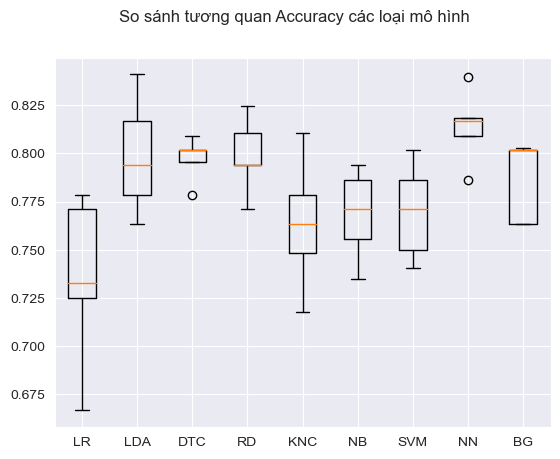

Precision LR: 46.196% (8.598%)
Precision LDA: 62.736% (4.941%)
Precision DTC: 58.615% (9.025%)
Precision RD: 62.202% (7.697%)
Precision KNC: 0.000% (0.000%)
Precision NB: 51.243% (7.800%)
Precision SVM: 50.408% (7.785%)
Precision NN: 64.406% (13.193%)
Precision BG: 55.667% (7.583%)


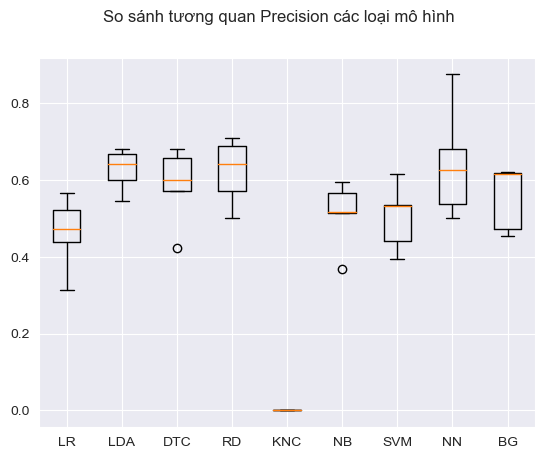

Recall LR: 74.780% (6.275%)
Recall LDA: 37.684% (6.347%)
Recall DTC: 53.813% (9.079%)
Recall RD: 39.455% (6.865%)
Recall KNC: 0.000% (0.000%)
Recall NB: 55.468% (3.646%)
Recall SVM: 70.769% (6.900%)
Recall NN: 46.450% (7.679%)
Recall BG: 42.041% (7.091%)


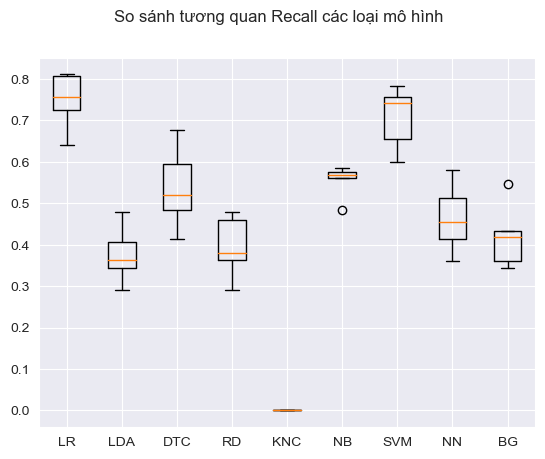

F1 LR: 56.950% (8.511%)
F1 LDA: 46.654% (4.838%)
F1 DTC: 57.884% (6.045%)
F1 RD: 47.610% (5.244%)
F1 KNC: 0.000% (0.000%)
F1 NB: 52.900% (5.089%)
F1 SVM: 58.821% (7.633%)
F1 NN: 50.457% (7.888%)
F1 BG: 47.797% (6.933%)


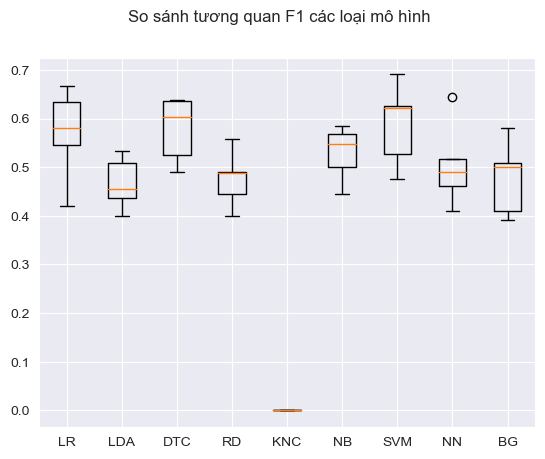

In [6]:
num_folds=5
seed=7
models=[]

models.append(('KNC',KNeighborsClassifier(n_neighbors=100)))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(class_weight=class_weights_dict)))
models.append(('NN',MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)))
models.append(('GD',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)))
#models.append(('Naive',MultinomialNB()))


RandomForestClassifier(n_estimators=500, 
                                max_depth=10, 
                                min_samples_split=400, 
                                random_state=12, 
                                class_weight=class_weights_dict,
                                )

results=[]
names=[]
scorings=['accuracy','precision','recall','f1']
#check_model('LR',LogisticRegression(class_weight=class_weights_dict),X_logistic,Y,names,results,scorings)
#check_model('LDA',LinearDiscriminantAnalysis(),X_linear,Y,names,results,scorings)
#check_model('CART',DecisionTreeClassifier(class_weight=class_weights_dict),X_decision,Y,names,results,scorings)
#check_model('RD',RandomForestClassifier(n_estimators=100, random_state=42,class_weight=class_weights_dict),X_forest,Y,names,results,scorings)



for scoring in scorings:
    check_model('LR',LogisticRegression(class_weight=class_weights_dict),x_train,y_train,names,results,scoring)
    check_model('LDA',LinearDiscriminantAnalysis(),x_train,y_train,names,results,scoring)
    check_model('DTC',DecisionTreeClassifier(class_weight=class_weights_dict),x_train,y_train,names,results,scoring)
    check_model('RD',RandomForestClassifier(n_estimators=100, random_state=42,class_weight=class_weights_dict),x_train,y_train,names,results,scoring)
    check_model('KNC',KNeighborsClassifier(n_neighbors=100),x_train,y_train,names,results,scoring)
    check_model('NB',GaussianNB(),x_train,y_train,names,results,scoring)
    check_model('SVM',SVC(class_weight=class_weights_dict),x_train,y_train,names,results,scoring)
    check_model('NN',MLPClassifier(hidden_layer_sizes=(100,), max_iter=500),x_train,y_train,names,results,scoring)
    check_model('BG',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42),x_train,y_train,names,results,scoring)
    fig=plt.figure()
    fig.suptitle(f'So sánh tương quan {scoring.title()} các loại mô hình')
    ax=fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
    results=[]
    names=[]


### Nhận xét dựa trên kết quả của tập train :

Mô hình NN (Neural Network): Mô hình này có độ chính xác cao nhất (81.402%) so với các mô hình khác. Tuy nhiên, chỉ số Recall của nó khá thấp (46.450%), điều này có nghĩa là mô hình này có thể bỏ sót một số trường hợp gian lận. Precision của nó cũng khá cao (64.406%), cho thấy mô hình này ít khi phân loại sai một hồ sơ không gian lận thành gian lận.

Mô hình LDA (Linear Discriminant Analysis): Mô hình này có độ chính xác thứ hai cao nhất (79.872%) và Precision cao (62.736%). Tuy nhiên, Recall của nó khá thấp (37.684%), cho thấy mô hình này có thể bỏ sót một số trường hợp gian lận.

Mô hình RD (Random Forest): Mô hình này có độ chính xác thứ ba cao nhất (79.876%) và Precision tương đối (62.202%). Tuy nhiên, Recall của nó cũng khá thấp (39.455%).

Mô hình DTC : Mặc dù có chỉ số Accuracy và Precision thấp hơn so với các mô hình trên , nhưng DTC có chỉ số Recall cao hơn các mô hình trên cho thấy được mô hình này bỏ sót trường hợp gian lận ít hơn các mô hình trên 


Từ kết quả trên ta thấy mô hình DecisionTreeClassifier là lựa chọn phù hợp nhất cho bài toán dự đoán hồ sơ gian lận, dựa trên sự cân bằng giữa các chỉ số đánh giá.

## 2 Mô hình đạt điểm cao nhất là:
    -DTC: DecisionTreeClassifer
    -SVM: Support Vector Machine


In [7]:
evaluate_result={}

### Mô hình SVM
      -Tỉ lệ đoán sai ở lớp bị đánh trọng số thấp cao

In [18]:
supervied_features=x_train[feature_selection['SVM']]
supervied_target=y_train
model=SVC(class_weight=class_weights_dict)
model.fit(supervied_features,supervied_target)

SVC(class_weight={0: 0.654690618762475, 1: 2.1161290322580646})

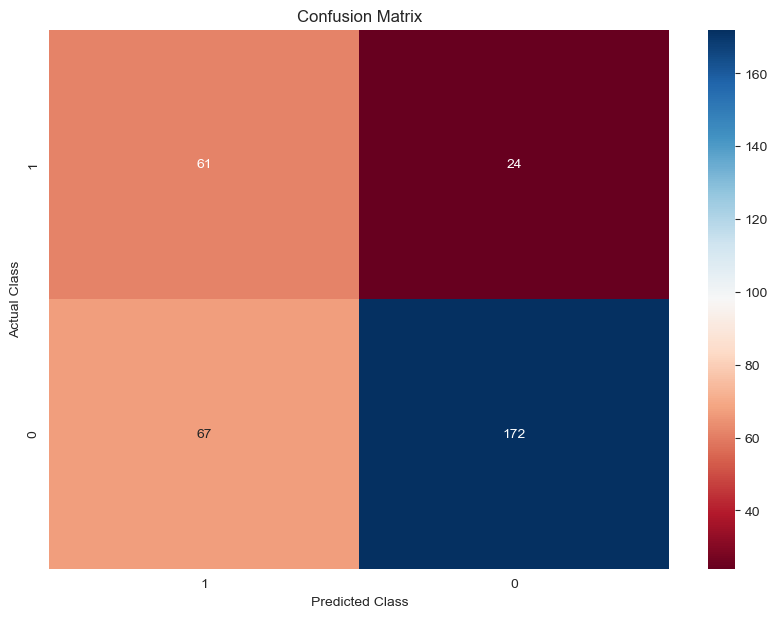

              precision    recall  f1-score   support

           0       0.88      0.72      0.79       239
           1       0.48      0.72      0.57        85

    accuracy                           0.72       324
   macro avg       0.68      0.72      0.68       324
weighted avg       0.77      0.72      0.73       324



In [19]:
predictions = model.predict(x_test[feature_selection['SVM']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['SVM']=classification_report(y_test, predictions)

print(classification_report(y_test, predictions))

### DecisionTreeClassifer

In [22]:
supervied_features=x_train[feature_selection['DTC']]
supervied_target=y_train
model=DecisionTreeClassifier(class_weight=class_weights_dict)
model.fit(supervied_features,supervied_target)

DecisionTreeClassifier(class_weight={0: 0.654690618762475,
                                     1: 2.1161290322580646})

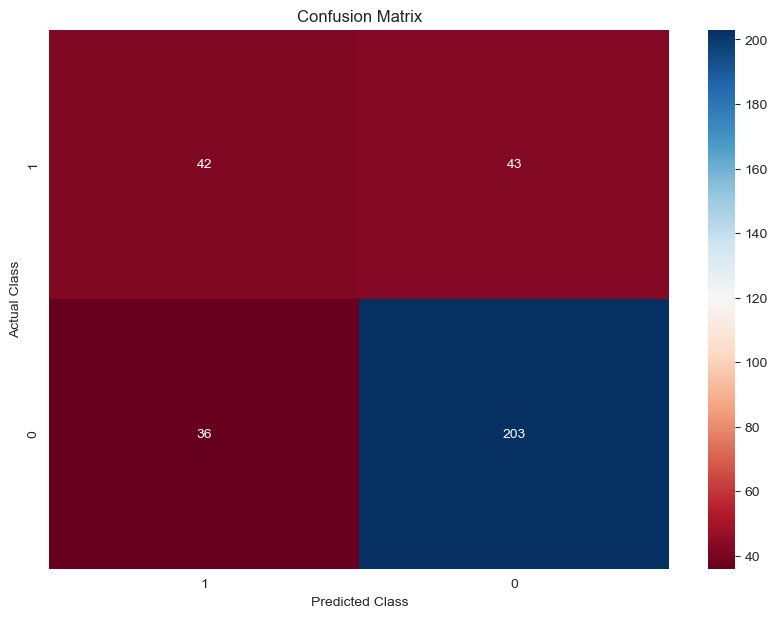

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       239
           1       0.54      0.49      0.52        85

    accuracy                           0.76       324
   macro avg       0.68      0.67      0.68       324
weighted avg       0.75      0.76      0.75       324



In [23]:
predictions = model.predict(x_test[feature_selection['DTC']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['DecisionTreeClassifer']=classification_report(y_test, predictions)
print(classification_report(y_test, predictions))

In [26]:
for x,y in evaluate_result.items():
    print(x)
    print(y)

LogisticRegression
              precision    recall  f1-score   support

           0       0.88      0.64      0.74       239
           1       0.42      0.75      0.54        85

    accuracy                           0.67       324
   macro avg       0.65      0.69      0.64       324
weighted avg       0.76      0.67      0.69       324

GaussianNB
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       239
           1       0.38      0.46      0.41        85

    accuracy                           0.66       324
   macro avg       0.58      0.59      0.59       324
weighted avg       0.68      0.66      0.67       324

MultinomialNB
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       239
           1       0.29      0.25      0.27        85

    accuracy                           0.64       324
   macro avg       0.52      0.51      0.51       324
weighted avg       0.63      0

### Nhận xét dựa trên kết quả tập test :

RD: Mô hình này có độ chính xác cao nhất (77%) so với các mô hình khác. Precision và Recall của nó cũng khá cân đối (0.81 và 0.90 cho lớp 0, 0.58 và 0.39 cho lớp 1), cho thấy mô hình này có hiệu suất tốt trong việc phân loại cả hai lớp.

DecisionTreeClassifier: Mô hình này có độ chính xác thứ hai cao nhất (76%) và Precision cao (0.83 cho lớp 0 và 0.54 cho lớp 1).  Recall của lớp 1 (0.49)lớn hơn so với mô hình RD , cho thấy mô hình phân loại trường hợp gian lận tốt hơn RD

GradientBoostingClassifier: Mô hình này có độ chính xác thứ ba cao nhất (74%) và Precision tương đối (0.80 cho lớp 0 và 0.52 cho lớp 1). Tuy nhiên, Recall của lớp 1 cũng khá thấp (0.40).

Từ những kết quả trên , kết luận lại DTC là mô hình cho hiệu suất cao nhất trong tập test này .

In [27]:
def check_result(prediction):
    if isinstance(prediction, (np.ndarray, pd.Series)):
        prediction = prediction.item()  # Hoặc sử dụng prediction[0] hoặc prediction.iloc[0]
    if prediction==1:
        return "Y"
    else:
        return "N"

In [28]:
def check_output(stt,model, X_test, Y_test):
    print(f"Lần thứ {stt}: ")
    indx = rd.randint(0, X_test.shape[0] - 1)  # Đảm bảo indx nằm trong giới hạn của DataFrame
    sample = X_test.iloc[indx, :].values        # Chuyển DataFrame thành mảng NumPy
    sample = np.expand_dims(sample, axis=0)     # Mở rộng kích thước cho phù hợp với mô hình
    y_predict = model.predict(sample)
    Y_check = check_result(Y_test.iloc[indx])
    print('True:', Y_check)
    print('Predicted:', check_result(y_predict))
    print("----------------------------")
    if Y_check==check_result(y_predict):
        return True
    else: return False
    
    

In [29]:
n_check=10
solandung=0
for i in range(n_check):
    if check_output(i+1,model, x_test[feature_selection['RD']], y_test):
        solandung+=1


Lần thứ 1: 
True: Y
Predicted: N
----------------------------
Lần thứ 2: 
True: N
Predicted: N
----------------------------
Lần thứ 3: 
True: N
Predicted: N
----------------------------
Lần thứ 4: 
True: N
Predicted: N
----------------------------
Lần thứ 5: 
True: Y
Predicted: Y
----------------------------
Lần thứ 6: 
True: N
Predicted: N
----------------------------
Lần thứ 7: 
True: N
Predicted: N
----------------------------
Lần thứ 8: 
True: N
Predicted: N
----------------------------
Lần thứ 9: 
True: N
Predicted: N
----------------------------
Lần thứ 10: 
True: Y
Predicted: N
----------------------------


In [30]:
print(f"Số lần dự đoán đúng: {solandung} chiếm khoảng {(solandung/n_check)*100}% tổng lần dự đoán")

Số lần dự đoán đúng: 8 chiếm khoảng 80.0% tổng lần dự đoán


In [31]:
solandung=0
for indx in range(len(x_test)):
    sample = x_test[feature_selection['RD']].iloc[indx, :].values        # Chuyển DataFrame thành mảng NumPy
    sample = np.expand_dims(sample, axis=0)     # Mở rộng kích thước cho phù hợp với mô hình
    y_predict = model.predict(sample)
    Y_check = check_result(y_test.iloc[indx])
    print('True:', Y_check)
    print('Predicted:', check_result(y_predict))
    print("----------------------------")
    if Y_check==check_result(y_predict):
        solandung+=1
    


True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: Y
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: Y
Predicted: Y
----------------------------


True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: Y
----------------------------
True: Y
Predicted: Y
----------------------------
True: Y
Predicted: Y
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: Y
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: Y
----------------------------
True: Y
Predicted: Y
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------


In [32]:
print(f"Số lần dự đoán đúng trong lan kiểm tra: {solandung} chiếm khoảng {(solandung/len(x_test))*100}% tổng lần dự đoán")


Số lần dự đoán đúng trong lan kiểm tra: 248 chiếm khoảng 76.5432098765432% tổng lần dự đoán
